link to ipl dataset: https://www.kaggle.com/datasets/maso0dahmed/ipl-first-inning-scoresf

Description:
This comprehensive dataset captures the essence of Indian Premier League (IPL) cricket matches by focusing on the first innings. It provides a rich source of information for predictive modeling and analysis, offering a nuanced understanding of the dynamics that unfold during these crucial phases of the game.

Features:
mid: Denotes the inning of the match, distinguishing between the first and second innings.

date: Represents the date of the match, offering temporal context to the data.

venue: Specifies the venue or ground where the match took place, influencing team strategies.

bat_team: Indicates the team currently batting, a critical aspect of understanding team dynamics.

bowl_team: Identifies the team currently bowling, shaping the match strategy.

batsman: Highlights the batsman on strike, a pivotal player in scoring runs.

bowler: Designates the bowler currently in action, a key figure in taking wickets.

runs: Quantifies the total runs scored by the batting team until the current moment in the inning.

wickets: Tracks the total number of wickets fallen until the current moment, affecting team performance.

overs: Records the total number of overs bowled until the current moment, influencing the pace of the game.

runs_last_5: Details the runs scored in the last 5 balls, offering insights into recent team performance.

wickets_last_5: Specifies the wickets taken in the last 5 balls, indicating recent breakthroughs or challenges.

striker: Represents the total runs made by the batsman on strike, a key contributor to the team's score.

non-striker: Indicates the total runs made by the non-striker, providing a holistic view of team contributions.

total: Serves as the target variable, representing the cumulative total runs aimed by the batting team for the inning.

Use Case:
This dataset is particularly valuable for tasks such as predictive modeling, where it can be employed to forecast the total runs a team is likely to score in the first inning based on a myriad of match-related parameters. Additionally, it enables in-depth statistical analysis to uncover patterns and factors influencing team performance in the dynamic landscape of IPL cricket matches.

Note:

The entries are organized chronologically, each capturing a specific moment in the inning.
The target variable (total) encapsulates the cumulative total runs made by the batting team, serving as the focal point for predictive endeavors.

In [297]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [298]:
data = pd.read_csv("ipl.csv")
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Data Exploration

In [299]:
iplcolumn = list(data.columns)
iplcolumn,len(iplcolumn)

(['mid',
  'date',
  'venue',
  'bat_team',
  'bowl_team',
  'batsman',
  'bowler',
  'runs',
  'wickets',
  'overs',
  'runs_last_5',
  'wickets_last_5',
  'striker',
  'non-striker',
  'total'],
 15)

In [300]:
for col_vc in iplcolumn:
    print(data[col_vc].value_counts())

mid
309    132
32     131
115    131
106    131
299    131
      ... 
403     91
241     74
479     65
495     63
384     50
Name: count, Length: 617, dtype: int64
date
2010-03-25    257
2011-04-22    257
2012-05-20    256
2015-04-25    255
2014-05-14    254
             ... 
2014-05-02    103
2008-05-07    103
2008-05-16     98
2012-04-05     74
2015-05-13     63
Name: count, Length: 442, dtype: int64
venue
M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium             

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [302]:
data.shape

(76014, 15)

In [303]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mid,76014.0,308.627740,178.156878,1.0,154.0,308.0,463.0,617.0
runs,76014.0,74.889349,48.823327,0.0,34.0,70.0,111.0,263.0
wickets,76014.0,2.415844,2.015207,0.0,1.0,2.0,4.0,10.0
overs,76014.0,9.783068,5.772587,0.0,4.6,9.6,14.6,19.6
runs_last_5,76014.0,33.216434,14.914174,0.0,24.0,34.0,43.0,113.0
wickets_last_5,76014.0,1.120307,1.053343,0.0,0.0,1.0,2.0,7.0
striker,76014.0,24.962283,20.079752,0.0,10.0,20.0,35.0,175.0
non-striker,76014.0,8.869287,10.795742,0.0,1.0,5.0,13.0,109.0
total,76014.0,160.901452,29.246231,67.0,142.0,162.0,181.0,263.0


In [304]:
data.describe(include="object").T

,count,unique,top,freq
date,76014,442,2010-03-25,257
venue,76014,35,M Chinnaswamy Stadium,7443
bat_team,76014,14,Mumbai Indians,10213
bowl_team,76014,14,Delhi Daredevils,10245
batsman,76014,411,SK Raina,1921
bowler,76014,329,Harbhajan Singh,1404


In [305]:
data = data.drop(["date"],axis=1)

In [306]:
data_num = data.select_dtypes(["int","float"])
data_obj = data.select_dtypes(["object"])


In [307]:
data_num_col = data_num.columns.tolist()
data_num_col

['mid',
 'runs',
 'wickets',
 'overs',
 'runs_last_5',
 'wickets_last_5',
 'striker',
 'non-striker',
 'total']

In [308]:
data_obj_col = data_obj.columns.tolist()
data_obj_col

['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']

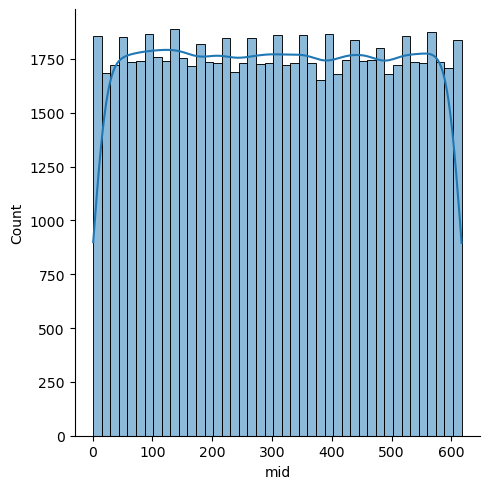

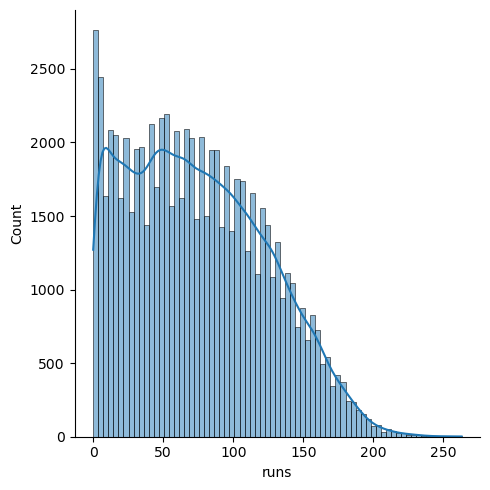

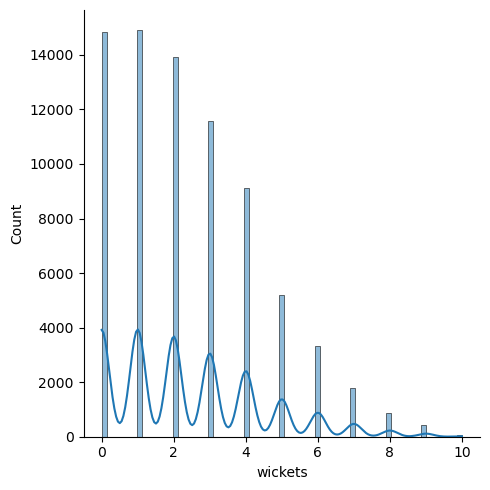

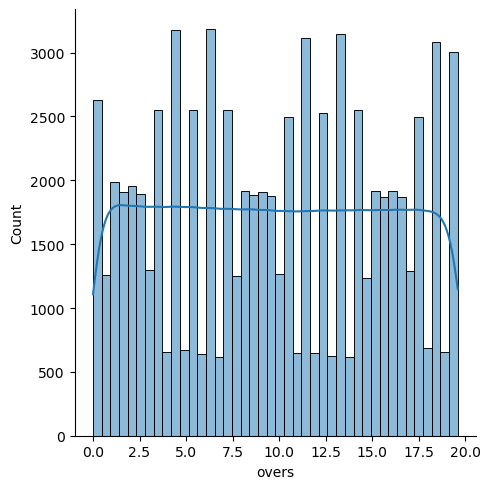

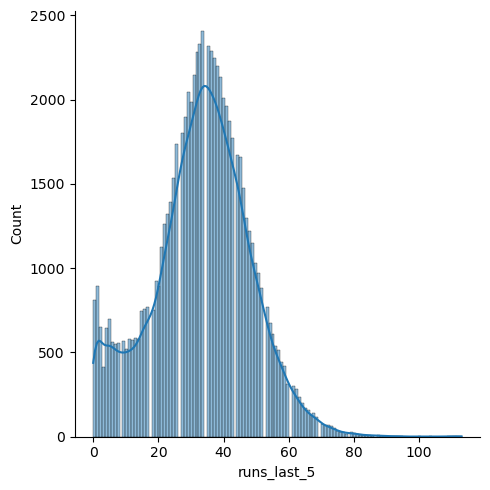

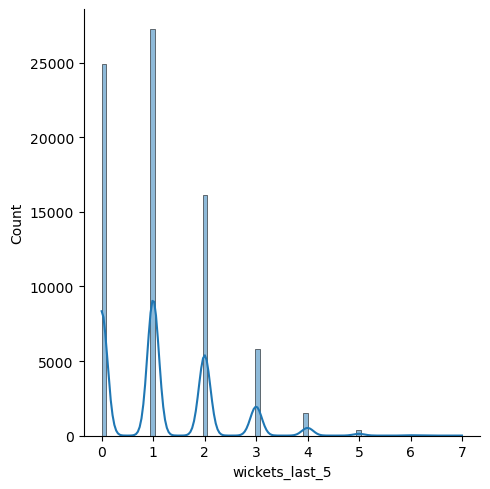

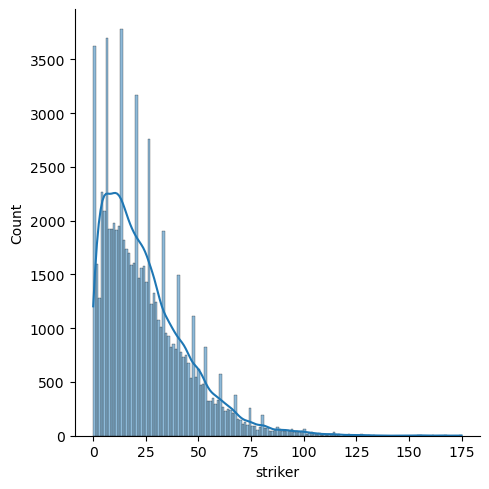

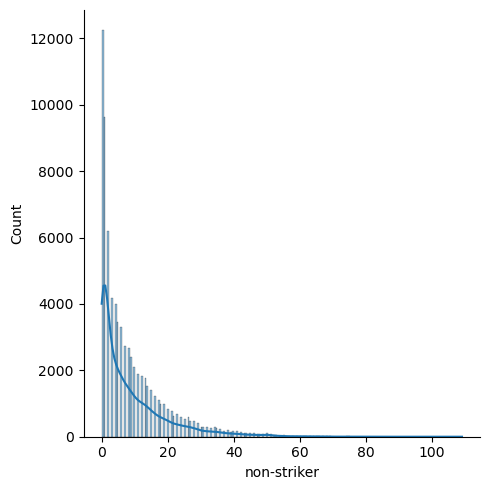

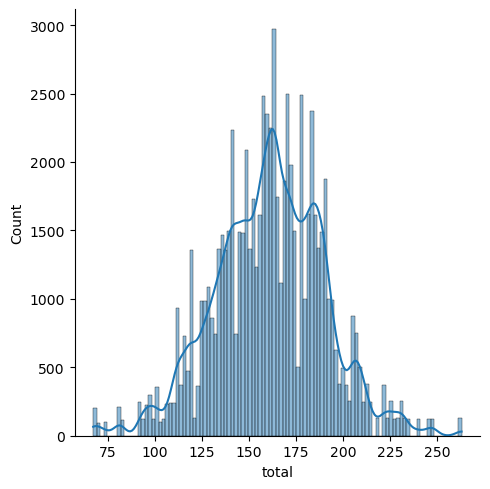

In [309]:
# numcol=[]
# for col in iplcolumn:
#     if data[col].dtypes!= "object":
#         numcol.append(col)
#         plt.hist(data[col])
#         plt.xlabel(col)
#         plt.show()

for i,v in enumerate(data_num_col):
    sns.displot(data[v], kde=True)
    plt.show()

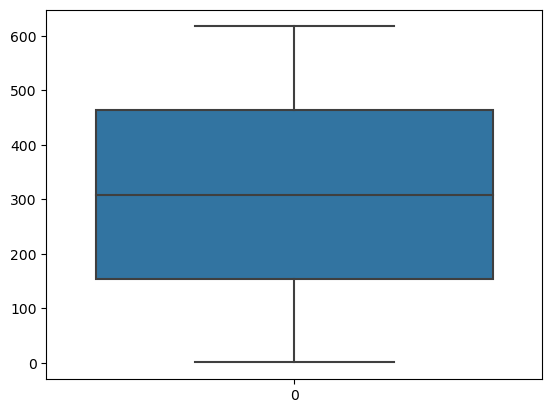

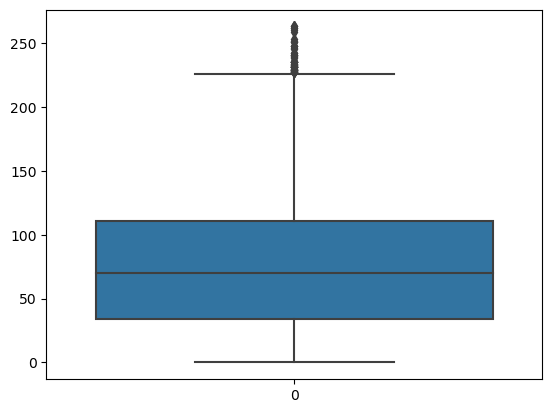

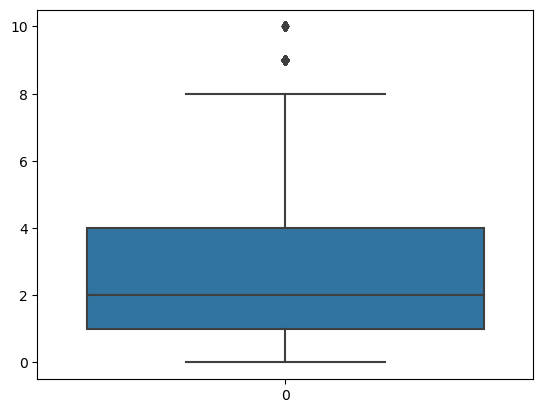

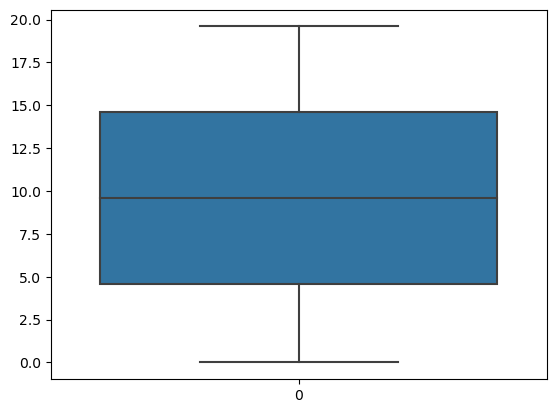

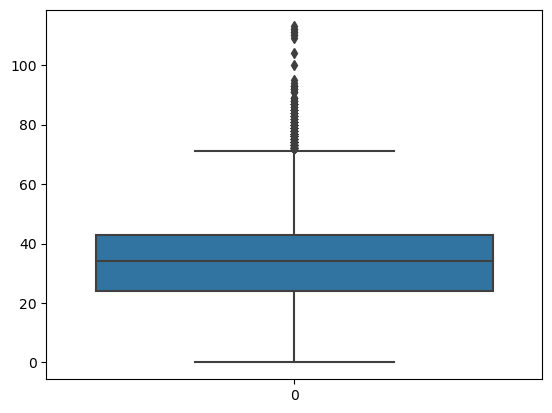

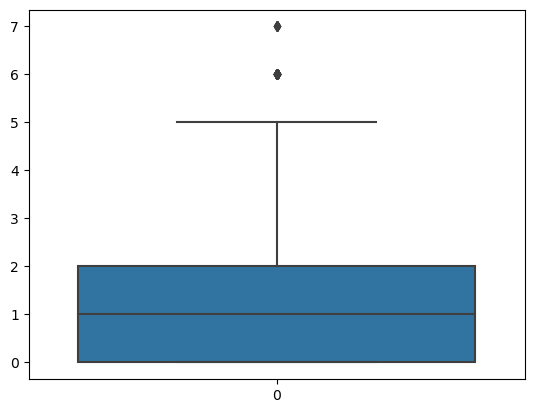

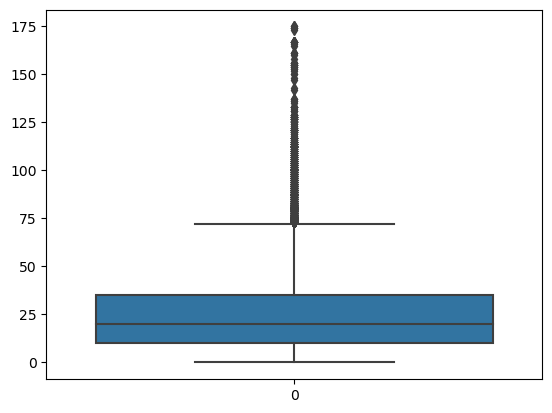

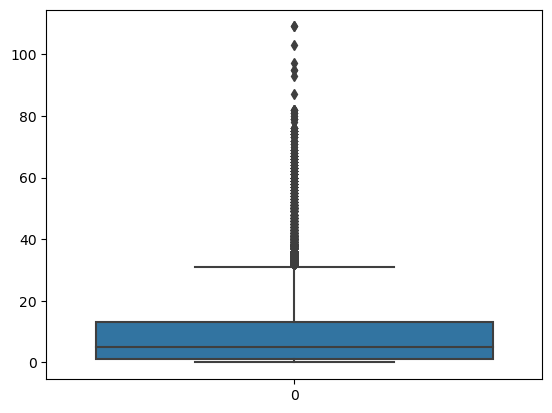

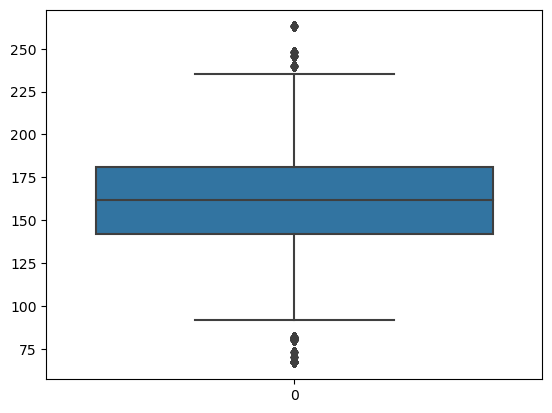

In [310]:
# for col in iplcolumn:
#     if data[col].dtypes== "int64" or data[col].dtypes=="float64":
#         plt.boxplot(data[col])
#         plt.xlabel(col)
#         plt.show()
        
for i,v in enumerate(data_num_col):
    sns.boxplot(data[v])
    plt.show()

In [311]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]= label.fit_transform(data[i])
        
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
# for i in data_obj:
#     data[i] = label.fit_transform(data[i])

data

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,14,6,12,328,201,1,0,0.1,1,0,0,0,222
1,1,14,6,12,61,201,1,0,0.2,1,0,0,0,222
2,1,14,6,12,61,201,2,0,0.2,2,0,0,0,222
3,1,14,6,12,61,201,2,0,0.3,2,0,0,0,222
4,1,14,6,12,61,201,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,23,7,10,172,96,121,7,19.2,40,0,40,12,129
76010,617,23,7,10,172,96,127,7,19.3,46,0,46,12,129
76011,617,23,7,10,172,96,128,7,19.4,47,0,47,12,129
76012,617,23,7,10,215,96,129,7,19.5,48,0,47,13,129


In [312]:
data.columns,len(data.columns)

(Index(['mid', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs',
        'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
        'non-striker', 'total'],
       dtype='object'),
 14)

# Split the data into features (X) and target (y) label sets

In [313]:
x = data.iloc[:,:-1]
y = pd.DataFrame(data["total"])

In [314]:
x

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker
0,1,14,6,12,328,201,1,0,0.1,1,0,0,0
1,1,14,6,12,61,201,1,0,0.2,1,0,0,0
2,1,14,6,12,61,201,2,0,0.2,2,0,0,0
3,1,14,6,12,61,201,2,0,0.3,2,0,0,0
4,1,14,6,12,61,201,2,0,0.4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,23,7,10,172,96,121,7,19.2,40,0,40,12
76010,617,23,7,10,172,96,127,7,19.3,46,0,46,12
76011,617,23,7,10,172,96,128,7,19.4,47,0,47,12
76012,617,23,7,10,215,96,129,7,19.5,48,0,47,13


In [315]:
y

,total
0,222
1,222
2,222
3,222
4,222
...,...
76009,129
76010,129
76011,129
76012,129


# Split the data into a training and test set

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8, random_state=30)

In [318]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60811, 13)
(60811, 1)
(15203, 13)
(15203, 1)


# Create and Train the Model

In [319]:
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [320]:
# regressor = LinearRegression()
# regressor.fit(x_train, y_train)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [321]:
regressor.intercept_ # y = mx+x intercept is c

array([160.28508462])

In [322]:
regressor.coef_   # y= mx+c coefficient is m

array([[ 6.48568947e-03, -1.82688288e-02,  1.05363727e-01,
        -3.30981272e-01,  2.63958813e-03, -1.46099252e-04,
         9.24053641e-01, -4.83041292e+00, -5.90885759e+00,
         8.40510155e-02, -1.83909558e+00, -3.43006724e-03,
        -6.67695322e-02]])

## Predicting the test set results

In [323]:
y_pred = dt.predict(x_test)
y_pred

array([148, 112, 130, ..., 169, 175, 154], dtype=int64)

In [324]:
error_pred = pd.DataFrame(columns = ["actual","predicted"])
error_pred

,actual,predicted


In [325]:
error_pred["actual"] = y_test
error_pred["predicted"] = y_pred
error_pred

,actual,predicted
50510,148,148
21582,112,112
19617,130,130
60283,163,163
31635,134,134
...,...,...
68527,162,162
29443,205,205
2438,169,169
66565,175,175


In [326]:
error_pred["error"] = error_pred.actual - error_pred.predicted
error_pred

,actual,predicted,error
50510,148,148,0
21582,112,112,0
19617,130,130,0
60283,163,163,0
31635,134,134,0
...,...,...,...
68527,162,162,0
29443,205,205,0
2438,169,169,0
66565,175,175,0


# Calculating the accuracy


In [327]:
from sklearn import metrics

In [328]:
print("Mean absolute error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean squared error:", np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print("Mean absolute percentage error:", metrics.mean_absolute_percentage_error(y_test, y_pred)*100)

Mean absolute error: 0.0024337301848319413
Mean squared error: 0.08070775504834572
Root Mean squared error: 0.04933285097003762
Mean absolute percentage error: 0.0013663477485246515


In [329]:
from sklearn.metrics import r2_score

In [331]:
r2_score(y_test,y_pred)*100

99.99051451253024

In [335]:
print('Accuracy:', (dt.score(x_test, y_test))*100)

Accuracy: 99.98026705255542


# Evaluate model using Confusion Matrix

In [343]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, dt.predict(x_train))
print(confusion_matrix)

[[162   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   0]
 [  0   0  74 ...   0   0   0]
 ...
 [  0   0   0 ...  95   0   0]
 [  0   0   0 ...   0  92   0]
 [  0   0   0 ...   0   0 107]]


In [344]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[44  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 30  0]
 [ 0  0  0 ...  0  0 21]]
